In [2]:
import pandas as pd
import matplotlib.pyplot as plt

We are going to cover two of the abstraction mechanisms available in Python.  These are completely separate to Jupyter or Pandas, they are fundamental parts of Python.  Both allow us to run the same code but with varying variables, loops if the variables are in a pattern, functions otherwise.

# Loops

Caveat: Many of the things you might see done with loops can be done with `groupby` or other pandas features, but they are often much easier to conceptualise as a loop.  For you,  the loop version might seem harder since it i sthe first time you have seen them.  However, with loops in your toolbox, you will find they make things simpler a lot of the time.

Start off by running through the [loops tutorial at w3schools](https://www.w3schools.com/python/python_for_loops.asp).  It is very succinct, but covers everything we need.

So a loop is a block of code, started by `for`, indented until completed, and there is normally one variable that changes in a pattern while hte block runs over and over.  When the pattern is complete, the code moves on from the loop.

Recall we plotted the cummulative rainfall for a particular year:

<AxesSubplot:>

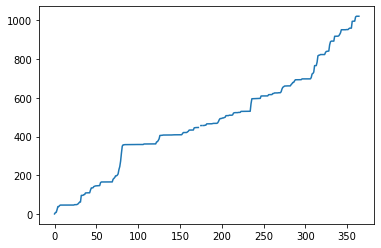

In [3]:
rainfall = pd.read_csv("data/rainfall/lithgow.csv")
year = 2021
choose_year = rainfall["Year"] == year
amount_year = rainfall[choose_year]["Rainfall amount (millimetres)"]
cummulative_year = amount_year.cumsum()
cummulative_year.reset_index()["Rainfall amount (millimetres)"].plot()


I can compare that year to 2022 by adding the 2022 data

<AxesSubplot:>

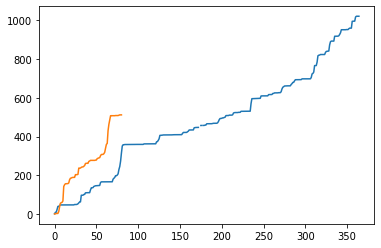

In [4]:
year = 2021
choose_year = rainfall["Year"] == year
amount_year = rainfall[choose_year]["Rainfall amount (millimetres)"]
cummulative_year = amount_year.cumsum()
ax = cummulative_year.reset_index()["Rainfall amount (millimetres)"].plot()
year = 2022
choose_year = rainfall["Year"] == year
amount_year = rainfall[choose_year]["Rainfall amount (millimetres)"]
cummulative_year = amount_year.cumsum()
cummulative_year.reset_index()["Rainfall amount (millimetres)"].plot(ax = ax)


You should notice that I have almost the exact same code twice!  I can use a loop for that instead.  I need to make an empty plot before the loop to make it work though.

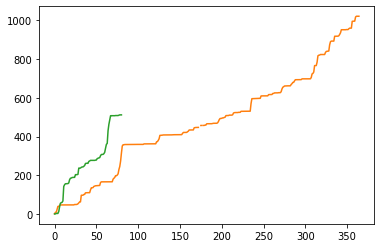

In [5]:
ax= pd.Series([], dtype="float64").plot()
for year in [2021,2022]:
    choose_year = rainfall["Year"] == year
    amount_year = rainfall[choose_year]["Rainfall amount (millimetres)"]
    cummulative_year = amount_year.cumsum()
    cummulative_year.reset_index()["Rainfall amount (millimetres)"].plot(ax = ax)

I can now extend this to every year, with some tricks I can get a really nice demonstration of how insane 2022 has been.

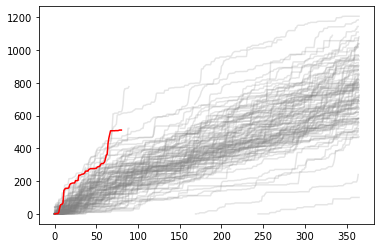

In [6]:
ax= pd.Series([], dtype="float64").plot()
for year in rainfall["Year"].drop_duplicates():
    if year == 2022:
        color = "Red"
        alpha = 1.0
    else:
        color = "Grey"
        alpha = 0.2
    choose_year = rainfall["Year"] == year
    amount_year = rainfall[choose_year]["Rainfall amount (millimetres)"]
    cummulative_year = amount_year.cumsum()
    cummulative_year.reset_index()["Rainfall amount (millimetres)"].plot(color=color,ax=ax, alpha=alpha)



# Exercise 

Plot the cummulative goals of every player in the afl statistics table.  The x-axis should be the number of games they have player and the y-axis should be their cummulative goal count at the end of that game.  Pick a player to highlight.

# Functions

We've been using functions this whole time.  Methods are also just like functions.

Read the [w3schools tutorial on python functions](https://www.w3schools.com/python/python_functions.asp) to get started

They are similar to loops in that there is a block of code and some variables vary, they are different in that the varying does not need to be in a pattern and you need to call a function multiple times to use it multiple times (loops automatically go around multiple times).

The most common use for functions in data science is:
  * As aggregation functions, like in `pivot_table`
  * As a block of code to do on each column or row with `apply`

We will do examples of each.

## Aggregation function

If I wanted to know what colour of mushroom was the riskiest, I might use my mushroom data and compute the percentage of poisinous mushrooms for each colour.  The code below would work, if I had a function that could _take in a list of strings and return the percentage of strings that were "poisonous".  Note that, to make the pivot work, I have given `len` as an aggregate, that will just tell me how many values were in each group.

In [10]:
mushrooms = pd.read_excel("data/fun.xlsx", "mushrooms")

mushrooms.pivot_table(columns="cap-color", values="class", aggfunc=len)

cap-color,brown,buff,cinnamon,gray,green,pink,purple,red,white,yellow
class,2284,168,44,1840,16,144,16,1500,1040,1072


I need a function that will take a list of strings, and calculate the percentage that are "poisonous".

In [12]:
def perc_poison(lst):
    found = 0
    total = 0
    for l in lst:
        total = total + 1
        if l == "poisonous":
            found = found + 1
    return found/total

mushrooms.pivot_table(columns="cap-color", values="class", aggfunc=perc_poison)

cap-color,brown,buff,cinnamon,gray,green,pink,purple,red,white,yellow
class,0.446585,0.714286,0.272727,0.43913,0.0,0.611111,0.0,0.584,0.307692,0.626866


Who would have tought?  Stick to green and purple mushrooms?  Note:  this data is junk, don't go mushroom foraging without professional guidance!

# Exercise

Generate a table (pivots will help) that summarises the medals for each person in each olypics.  I.e. the index should be the athlete name, the columns should be the individual olympics and the data should be:
  * "None" if they won no medals
  * "Silver, Gold" if they got one silver and one gold
  * etc.
NB: Order doesn't matter.

# `apply`

The apply method is the "tool of last resort".  If we can't work out how to do what we want with other tools, we use this one.
  * [Series `apply`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) will apply a given function to every value in the series
  * [DataFrame `apply`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) will apply a function to every column (if `index` is `0`) or row-converted-to-series (if `index` is `1`)

Lets adjust the medals to a "score".  Gold is worth 5, silver 3, bronze 1.

In [21]:
athletes = pd.read_excel("data/fun.xlsx", "athlete_events")


In [38]:
def medal_to_score(medal):
    if (medal == "Gold"):
        return 5
    elif (medal == "Silver"):
        return 3
    elif (medal == "Bronze"):
        return 1
    else:
        return 0

athletes["score"] = athletes["Medal"].apply(medal_to_score)
athletes.pivot_table(index="Name", columns="Games", values="score", aggfunc=sum).fillna(0).apply(sum, axis=1).sort_values(ascending=False).head(50)

Name
Michael Fred Phelps, II                            126.0
Larysa Semenivna Latynina (Diriy-)                  64.0
Paavo Johannes Nurmi                                54.0
Nikolay Yefimovich Andrianov                        53.0
Ole Einar Bjrndalen                                 53.0
Birgit Fischer-Schmidt                              52.0
Raymond Clarence "Ray" Ewry                         50.0
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     50.0
Sawao Kato                                          50.0
Borys Anfiyanovych Shakhlin                         49.0
Mark Andrew Spitz                                   49.0
Frederick Carlton "Carl" Lewis                      48.0
Vra slavsk (-Odloilov)                              47.0
Edoardo Mangiarotti                                 47.0
Matthew Nicholas "Matt" Biondi                      47.0
Viktor Ivanovych Chukarin                           45.0
Aleksandr Vladimirovich Popov                       43.0
Isabelle Regina Werth     

# Exercise - Fantasy Football

Imagine you are setting up your own fantasy football league for AFL.  You decide each "disposal" is worth 1 point, each "Goal" is worth 2 points, and each "clanger" is worth -5 points.  "Ruck"s get 10 bonus points because it is a hard job and "Forwards" start with -10 points because they camp in front of goals all game.  Generate a table that gives each player their score by your measure for each game they played in (i.e. calculate points for each row of the `stats` table).  Sort the table by points so we can see the best players.